In [2]:
import xarray as xr
import glob
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import sys
import scipy
sys.path.append("/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/Notebooks/")
from Sc_module import convert_single_timestamp
from Sc_module import convert_to_float_timestamps
from Sc_module import ucla_time2useful_time
# from Sc_module import ucla_time2useful_time
plt.rc('font', size=12) 
myFmt = mdates.DateFormatter('%H:%M')
plt.style.use('seaborn-poster')

######################################################

path = "/home/qwertz/UCLA/uclales/Runs/"

ds_ICON_unsharp_orig_div_ps = xr.open_dataset(path+"11_Mimic_ICON_unsharp_orig_div/rf01.ps.nc")
ds_ICON_unsharp_ps = xr.open_dataset(path+"11_Mimic_ICON_unsharp/rf01.ps.nc")
ds_ICON_unsharp_middiv_ps = xr.open_dataset(path+"11_Mimic_ICON_unsharp_middiv/rf01.ps.nc")
ds_ICON_sharp_orig_div_ps = xr.open_dataset(path+"11_Mimic_ICON_sharp_orig_div/rf01.ps.nc")
ds_ICON_sharp_middiv_ps = xr.open_dataset(path+"11_Mimic_ICON_sharp_middiv/rf01.ps.nc")
ds_ICON_sharp_ps = xr.open_dataset(path+"11_Mimic_ICON_sharp/rf01.ps.nc")


# ds_ICON_unsharp_middiv_ps = xr.open_dataset(path+" /rf01.ps.nc")
# ds_ICON_unsharp_middiv_ps = xr.open_dataset(path+" /rf01.ps.nc")

#######################


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


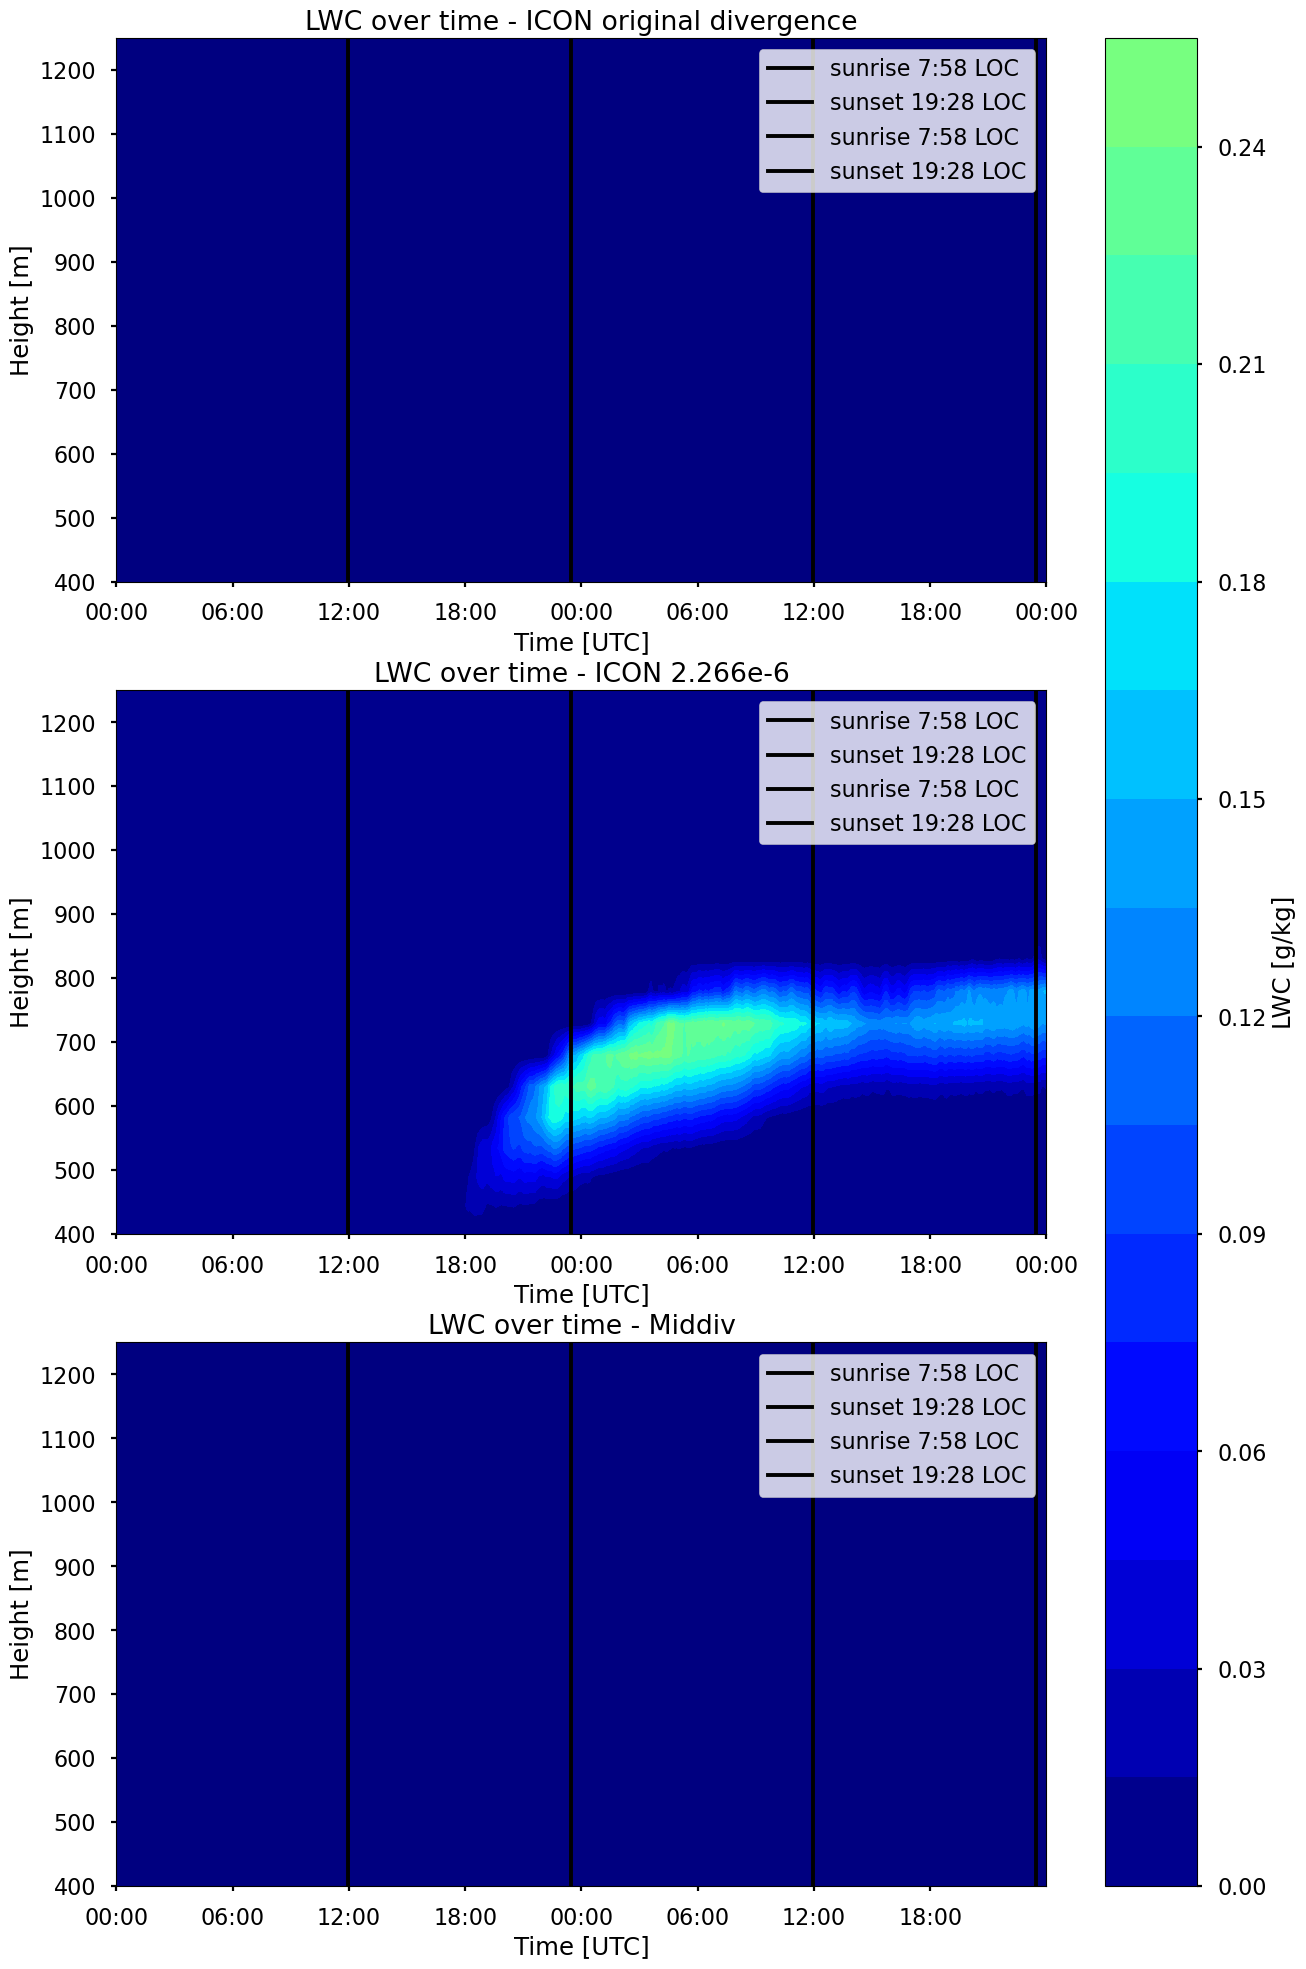

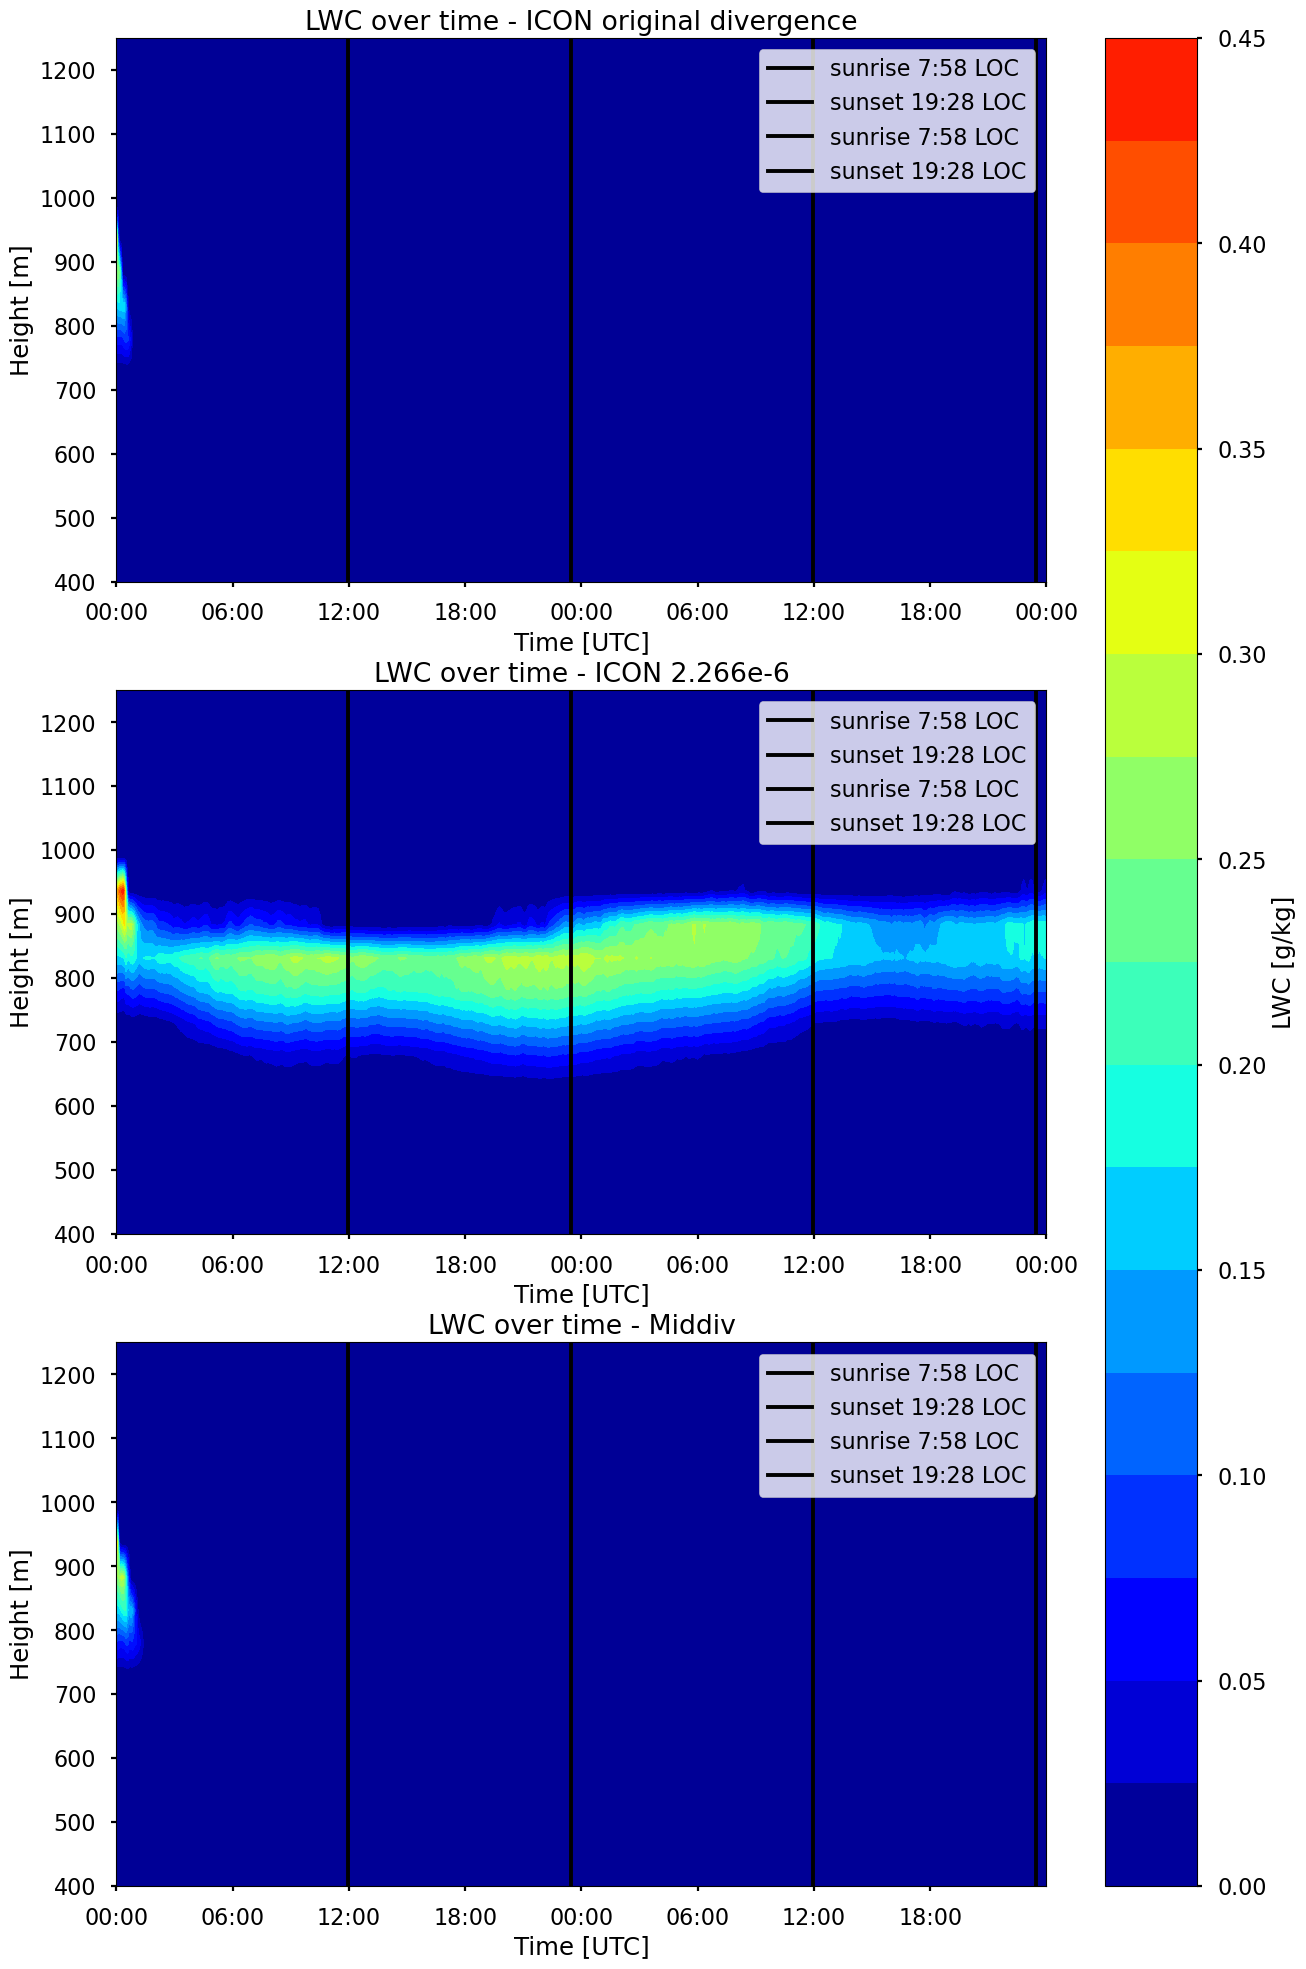

In [4]:
outputdir = "/home/qwertz/Dokumente/N_eigene_Dokumente/Geo_Met_MSc/Semester_4_5/Thesis_prep_Juni_23/MA/master_plots/18_UCLA_11_sims/"

#############################

def plot_lwc_over_time(ax, ps_ds, name):
    # print(ucla_times)
    c = ax.contourf(ps_ds["time"].values, ps_ds["zt"], ps_ds["l"].T, levels=20, cmap="jet", vmin=0, vmax=0.5)
    ax.set_ylim(400, 1250)
    ax.set_ylabel("Height [m]")
    ax.set_title("LWC over time - " + name)
    ax.xaxis.set_major_formatter(myFmt)
    ax.axvline(np.datetime64("2000-01-01T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2000-01-01T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.axvline(np.datetime64("2000-01-02T11:58:00"), color="black",label="sunrise 7:58 LOC")
    ax.axvline(np.datetime64("2000-01-02T23:28:00"), color="black",label="sunset 19:28 LOC")
    ax.legend()
    return c

#############################

# 1. Figure: unsharp ICON divergence
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes1[0], ds_ICON_unsharp_orig_div_ps, "ICON original divergence")
c1 = plot_lwc_over_time(axes1[1], ds_ICON_unsharp_ps, "ICON 2.266e-6")
plot_lwc_over_time(axes1[2], ds_ICON_unsharp_middiv_ps, "Middiv")
fig1.colorbar(c1, ax=axes1[:], label="LWC [g/kg]")
plt.xticks(np.arange(np.datetime64("2000-01-01T00:00:00") , np.datetime64("2000-01-03T00:00:00"),21600),\
              ["00:00", "06:00", "12:00", "18:00", "00:00", "06:00", "12:00", "18:00"])

for ax in axes1:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_LWC_ICON_divergence_origtime.png")
plt.show()

#############################

# 1. Figure: sharp ICON divergence
fig1, axes1 = plt.subplots(3, 1, figsize=(15, 24))

plot_lwc_over_time(axes1[0], ds_ICON_sharp_orig_div_ps, "ICON original divergence")
c1 = plot_lwc_over_time(axes1[1], ds_ICON_sharp_ps, "ICON 2.266e-6")
plot_lwc_over_time(axes1[2], ds_ICON_sharp_middiv_ps, "Middiv")
fig1.colorbar(c1, ax=axes1[:], label="LWC [g/kg]")
plt.xticks(np.arange(np.datetime64("2000-01-01T00:00:00") , np.datetime64("2000-01-03T00:00:00"),21600),\
              ["00:00", "06:00", "12:00", "18:00", "00:00", "06:00", "12:00", "18:00"])

for ax in axes1:
    ax.set_xlabel("Time [UTC]")

#plt.tight_layout()
plt.savefig(outputdir + "MultiPanel_LWC_ICON_divergence_origtime.png")
plt.show()

#############################

In [ ]:
# Werte abgebrochene Läufe aus, um zu verstehen, woran es vielleicht lag:


